### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Load Datasets

The datasets consist of two type of dataset: margin and sales dataset.

1. **Margin Dataset**: a small workbook containing the average margin of profit for every brand they have sold in the past 3 years. For the sake of this project, this margin value would be assumed as the average margin for all sales happen.

The margin dataset consists of 3 columns:
* `Category` : The product category
* `Maker` : The maker or the brand of the product
* `Margin` : The average margin of profit for the past 3 years

In [3]:
#load margin dataset
margin = pd.read_excel('Margin.xlsx')
margin

,Category,Maker,Margin
0,Air Conditioners,Toshino,86000
1,Air Conditioners,Yoshikawa,62000
2,Air Conditioners,Funami,73000
3,Air Conditioners,Akaza,120000
4,Refrigerators,Omuro,26000
5,Refrigerators,Funami,98000
6,Refrigerators,Akaza,112000
7,Refrigerators,Yoshikawa,109000
8,Refrigerators,Shimada,98000
9,Refrigerators,Nanase,104000


In [4]:
#get the shape of dataset
print(margin.shape[0], ' rows ', margin.shape[1], ' columns.')

52  rows  3  columns.


In [5]:
#get general infomation on data types and missing values
margin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  52 non-null     object
 1   Maker     52 non-null     object
 2   Margin    52 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [6]:
#check duplicated values
margin.duplicated().sum()

0

2. **Sales Dataset**: a group of dataset which explains sales for each product every day. The datasets are broken down into separate files divided by quarters. The client presents the record of the sales from the 1st quarter of 2010 to 2nd quarter of 2021, so there are 46 files we should process and analyze further.

The sales dataset consists of 7 columns:
* `Date` : The date when the sales happen. No sales data for weekends and public holidays as the warehouses only operate on weekdays.
* `Category1` : The first word of product category
* `Category2` : The second word of product category
* `Category2` : The third word of product category
* `Maker` : The maker or the brand of the product
* `Sales` : The total amount of the product sold on that day
* `Identifier` : The identifier code of the product. 

In [7]:
#Load sales dataset
import os
import pandas as pd

# Set the directory path where the CSV files are stored
path = 'C:/Users/user/Data_Analytics/IlmuOne Data Pre-Processing Test Submission'

# Loop through each file in the directory
dfs = []
for file in os.listdir(path):
    # Check if file is a CSV file
    if file.endswith('.csv'):
        # Read the CSV file as a dataframe
        df = pd.read_csv(os.path.join(path, file))
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes into one dataframe
salesmerged_df = pd.concat(dfs, ignore_index=True)

# Print the merged dataframe
salesmerged_df.head()

,Date,Category1,Category2,Category3,Maker,Sales,Identifier
0,2010-02-15,Air,Conditioners,NaN,Toshino,2143.0,RVFWTWSMNU
1,2010-02-15,Water,Heaters,NaN,Furutani,567.0,PF4KB33DVZ
2,2010-02-15,Washers,&,Dryers,Akaza,3515.0,VUQUQMHODG
3,2010-02-15,Refrigerators,NaN,NaN,Akaza,687.0,XVIOZZOUTN
4,2010-02-15,Washers,&,Dryers,Shimada,435.0,RBRMDIXXGL


In [8]:
salesmerged_df.tail()

,Date,Category1,Category2,Category3,Maker,Sales,Identifier
134959,2021-04-29,Air,Conditioners,NaN,Akaza,1609.0,IVOI4I03JA
134960,2021-04-29,Washers,&,Dryers,Akaza,5422.0,VUQUQMHODG
134961,2021-04-29,Vacuum,Cleaners,NaN,Hayashida,539.0,GCPKFKSEWG
134962,2021-04-29,Water,Pumps,NaN,Furutani,10547.0,FVDHIZGQRC
134963,2021-04-29,Televisions,NaN,NaN,Kikuma,805.0,FRBLLORNXN


In [9]:
#get the shape of dataset
print(salesmerged_df.shape[0], ' rows ', salesmerged_df.shape[1], ' columns.')

134964  rows  7  columns.


In [10]:
#show the dataset info
salesmerged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134964 entries, 0 to 134963
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        134964 non-null  object 
 1   Category1   134964 non-null  object 
 2   Category2   93196 non-null   object 
 3   Category3   30603 non-null   object 
 4   Maker       134964 non-null  object 
 5   Sales       129588 non-null  float64
 6   Identifier  134964 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.2+ MB


column `Date` is still in a wrong data type, so we need to convert it into a date datatype.

In [11]:
# Convert 'Date' column to datetime dtype
salesmerged_df['truedate'] = pd.to_datetime(salesmerged_df['Date'], format='%Y-%m-%d')

# Drop the original 'Date' column
salesmerged_df.drop('Date', axis=1, inplace=True)

# Rename the 'truedate' column to 'Date'
salesmerged_df = salesmerged_df.rename(columns={'truedate': 'Date'})

# Rearrange the columns in a new order
salesmerged_df = salesmerged_df[['Date', 'Category1', 'Category2', 'Category3', 'Maker', 'Sales', 'Identifier']]

# Print the resulting dataframe
salesmerged_df.head()

,Date,Category1,Category2,Category3,Maker,Sales,Identifier
0,2010-02-15,Air,Conditioners,NaN,Toshino,2143.0,RVFWTWSMNU
1,2010-02-15,Water,Heaters,NaN,Furutani,567.0,PF4KB33DVZ
2,2010-02-15,Washers,&,Dryers,Akaza,3515.0,VUQUQMHODG
3,2010-02-15,Refrigerators,NaN,NaN,Akaza,687.0,XVIOZZOUTN
4,2010-02-15,Washers,&,Dryers,Shimada,435.0,RBRMDIXXGL


In [12]:
#show the updated info of dataset
salesmerged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134964 entries, 0 to 134963
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        134964 non-null  datetime64[ns]
 1   Category1   134964 non-null  object        
 2   Category2   93196 non-null   object        
 3   Category3   30603 non-null   object        
 4   Maker       134964 non-null  object        
 5   Sales       129588 non-null  float64       
 6   Identifier  134964 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 7.2+ MB


In [13]:
#check missing values again
print('row with missing values : ', salesmerged_df.isna().any(axis=1).sum(), 'rows')
print('in percentage :', salesmerged_df.isna().any(axis=1).sum()/salesmerged_df.shape[0])

row with missing values :  105630 rows
in percentage : 0.7826531519516315


Almost 79% of dataset contain missing values, which is understandable since the product category data collection system can easily expose this problem. So, here what we want is to show which records miss their sales data.

In [14]:
#check missing values specifically in sales column
print('row with missing values : ', salesmerged_df['Sales'].isna().sum(), 'rows')
print('in percentage :', salesmerged_df['Sales'].isna().sum()/salesmerged_df.shape[0])

row with missing values :  5376 rows
in percentage : 0.0398328443140393


Fortunately, the missing values on sales date only found in 3.98% of records. It can be handled by simply deleting them since they are not significant or fill them with their average sales number in the month.

In [15]:
#check duplicated values
salesmerged_df.duplicated().sum()

0

## 1. Data Description Report

Source of Dataset: Attached zip file in IlmuOne Data Scientist 2021 Brief
Amount of Files: 46 csv files (sales dataset) and 1 xlsx file (margin dataset)

**Sales Dataset**

A group of dataset which explains sales for each product every day.

* **Data Colletion Practice**: Collected into separate files divided by quarters every year. From Q1 2010 (in '2010Q1.csv') to Q2 2021 (in '2021Q2.csv')

* **Date Range**: '2010-02-15' (February 15th, 2010) to '2021-04-29' (April 29th, 2021)

* **Data Structure**: After all these files merged, there are 134964 rows and 7 columns. The columns are:
    * `Date` : The date when the sales happen. No sales data for weekends and public holidays as the warehouses only operate on weekdays. (data type: object - 134964 non-null data)
    * `Category1` : The first word of product category. (object - 134964 non-null)
    * `Category2` : The second word of product category. (object - 134964 non-null)
    * `Category2` : The third word of product category. (object - 93196 non-null)
    * `Maker` : The maker or the brand of the product. (object - 30603 non-null)
    * `Sales` : The total amount of the product sold on that day. (float64 - 129588 non-null)
    * `Identifier` : The identifier code of the product. (object - 134964 non-null)
    
* **Data Quality**: There are 105630 rows (78.27%) with missing values in at least one of the columns. No duplicated data

**Margin Dataset**

A dataset containing the average margin of profit for every brand they have sold in the past 3 years.

* **Data Colletion Practice**: Collected into single xlsx file

* **Data Structure**: There are 52 rows and 3 columns. The columns are:
    * `Category` : The product category. (data type: object - 52 non-null data)
    * `Maker` : The maker or the brand of the product. (object - 52 non-null)
    * `Margin` : The average margin of profit for the past 3 years. (int64 - 52 non-null)
    
* **Data Quality**: There are no missing values and duplicated data

### Data Cleaning

In [16]:
#create a copy of the dataset
cleansales_df = salesmerged_df.copy()

# drop rows with missing values in column 'Sales'
cleansales_df = cleansales_df.dropna(subset=['Sales'])

cleansales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129588 entries, 0 to 134963
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        129588 non-null  datetime64[ns]
 1   Category1   129588 non-null  object        
 2   Category2   89414 non-null   object        
 3   Category3   29334 non-null   object        
 4   Maker       129588 non-null  object        
 5   Sales       129588 non-null  float64       
 6   Identifier  129588 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 7.9+ MB


There are 129588 rows of data remains in `sales dataset`. For `margin dataset`, we do not need to conduct any data cleaning practive since no missing values found. 

Next we have to handle missing values found in `Category2` and `Category3` columns by merging them to `Category1` column.

In [17]:
#merge product category columns so the dataframe can be more effective
cleansales_df['Category'] = cleansales_df['Category1'].fillna('').astype(str) + ' ' + cleansales_df['Category2'].fillna('').astype(str) + ' ' + cleansales_df['Category3'].fillna('').astype(str)

# remove leading and trailing whitespaces
cleansales_df['Category'] = cleansales_df['Category'].str.strip()

# Drop the original column
cleansales_df.drop(['Category1', 'Category2', 'Category3'], axis=1, inplace=True)

# Rearrange the columns in a new order
cleansales_df = cleansales_df[['Date', 'Category', 'Maker', 'Sales', 'Identifier']]

# print the dataframe with merged column
cleansales_df

,Date,Category,Maker,Sales,Identifier
0,2010-02-15,Air Conditioners,Toshino,2143.0,RVFWTWSMNU
1,2010-02-15,Water Heaters,Furutani,567.0,PF4KB33DVZ
2,2010-02-15,Washers & Dryers,Akaza,3515.0,VUQUQMHODG
3,2010-02-15,Refrigerators,Akaza,687.0,XVIOZZOUTN
4,2010-02-15,Washers & Dryers,Shimada,435.0,RBRMDIXXGL
...,...,...,...,...,...
134959,2021-04-29,Air Conditioners,Akaza,1609.0,IVOI4I03JA
134960,2021-04-29,Washers & Dryers,Akaza,5422.0,VUQUQMHODG
134961,2021-04-29,Vacuum Cleaners,Hayashida,539.0,GCPKFKSEWG
134962,2021-04-29,Water Pumps,Furutani,10547.0,FVDHIZGQRC


Note that we did not reset index, since we get different last index with total amount of rows. This practice will be included in the next step, when creating the fact dataset.

In [18]:
cleansales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129588 entries, 0 to 134963
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Date        129588 non-null  datetime64[ns]
 1   Category    129588 non-null  object        
 2   Maker       129588 non-null  object        
 3   Sales       129588 non-null  float64       
 4   Identifier  129588 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 5.9+ MB


Check if the data of product category in sales dataset and margin dataset are matched

In [19]:
#create a new dataframe only contains of category and maker from sales dataset
productdf1 = cleansales_df[['Category', 'Maker']]
productdf1['Category_Maker'] = productdf1['Category'] + ' ' + productdf1['Maker']

#create a new dataframe only contains of category and maker from margin dataset
productdf2 = margin[['Category', 'Maker']]
productdf2['Category_Maker'] = productdf2['Category'] + ' ' + productdf2['Maker']

print('Is all product category matched? ', productdf1['Category_Maker'].isin(productdf2['Category_Maker']).all())

Is all product category matched?  True


Create a fact sales dataset to merge between sales dataset and margin dataset, so we just have to work on a single dataset

In [20]:
#merge sales and margin dataset on Category and Maker columns
factsales_df =  pd.merge(cleansales_df, margin, on=['Category', 'Maker'], how='left')

#create a new column to total the sales and margin
factsales_df['TotalProfit'] = factsales_df['Sales']*factsales_df['Margin']

#sort our dataset
factsales_df = factsales_df.sort_values('Date').reset_index(drop=True)

factsales_df

,Date,Category,Maker,Sales,Identifier,Margin,TotalProfit
0,2010-02-15,Air Conditioners,Toshino,2143.0,RVFWTWSMNU,86000,184298000.0
1,2010-02-15,Rice Cookers,Ikeda,245.0,JYINACMKHE,14000,3430000.0
2,2010-02-15,Ovens & Cooktops,Toshino,3158.0,LFIEXBAPFQ,77000,243166000.0
3,2010-02-15,Rice Cookers,Furutani,2233.0,ZJZZJNDFOZ,23000,51359000.0
4,2010-02-15,Ovens & Cooktops,Sugiura,3594.0,LBABGBBMJJ,83000,298302000.0
...,...,...,...,...,...,...,...
129583,2021-04-29,Water Heaters,Furutani,1238.0,PF4KB33DVZ,36000,44568000.0
129584,2021-04-29,Refrigerators,Funami,1004.0,BIBIOOIHA,98000,98392000.0
129585,2021-04-29,Televisions,Katayama,2229.0,VZAQLWEGXU,92000,205068000.0
129586,2021-04-29,Water Heaters,Yoshikawa,212.0,DUVTZNWNAB,52000,11024000.0


## 2. Take out the data belonging to PT. D.K. Works.

The data they have is actually mixed with the data belonging to their sister company, PT. D.K. Works, before their split last year.

Luckily, we were also supplied with good news that these foreign data are easily identifiable, as they can be recognized by products having one or more digits in their identifier code. The identifier code is a string of 10 characters that consist of only letters in the data belonging to the client.

For example, a product with an identifier of “CTCNSTZEDP” belongs to PT. Denki Kobo (the client), while a product with an identifier of “PRN3TK7HWK” belongs to PT. D.K. Works (the sister company). Notice that the data belonging to PT D.K. Works has the number 3 and 7 in the identifier code. Since the client and PT. D.K. Works had already parted ways, they requested that the latter’s data be taken out.

In [21]:
#filter out rows with digits in Identifier column
clientsales_df = factsales_df[~factsales_df['Identifier'].str.contains('\d')].reset_index(drop=True)

# show the updated dataframe
clientsales_df

,Date,Category,Maker,Sales,Identifier,Margin,TotalProfit
0,2010-02-15,Air Conditioners,Toshino,2143.0,RVFWTWSMNU,86000,184298000.0
1,2010-02-15,Rice Cookers,Ikeda,245.0,JYINACMKHE,14000,3430000.0
2,2010-02-15,Ovens & Cooktops,Toshino,3158.0,LFIEXBAPFQ,77000,243166000.0
3,2010-02-15,Rice Cookers,Furutani,2233.0,ZJZZJNDFOZ,23000,51359000.0
4,2010-02-15,Ovens & Cooktops,Sugiura,3594.0,LBABGBBMJJ,83000,298302000.0
...,...,...,...,...,...,...,...
89493,2021-04-29,Water Heaters,Ikeda,301.0,AHSRVKIOLJ,35000,10535000.0
89494,2021-04-29,Refrigerators,Funami,1004.0,BIBIOOIHA,98000,98392000.0
89495,2021-04-29,Televisions,Katayama,2229.0,VZAQLWEGXU,92000,205068000.0
89496,2021-04-29,Water Heaters,Yoshikawa,212.0,DUVTZNWNAB,52000,11024000.0


### Exploratory Data Analysis

Statistical Summary, Univariate, and Bivariate Analysis.

**Statistical Summary and Univariate Analysis**

In [22]:
#divide columns into numerical and categorical
nums = []
cats = []

for col in clientsales_df.columns:
    if (clientsales_df[col].dtypes == 'int64') | (clientsales_df[col].dtypes == 'float64'):
        nums.append(col)
    else:
        cats.append(col)

**Numerical Columns**

In [23]:
#statistical summary for numerical columns
clientsales_df[nums].describe()

,Sales,Margin,TotalProfit
count,89498.000000,89498.000000,8.949800e+04
mean,4146.501453,59189.724910,1.716411e+08
std,6281.541206,32739.594895,1.863766e+08
min,62.000000,14000.000000,3.304000e+06
25%,792.000000,29000.000000,4.283300e+07
50%,1697.000000,57000.000000,1.061990e+08
75%,4868.000000,86000.000000,2.265120e+08
max,56785.000000,185000.000000,1.132698e+09


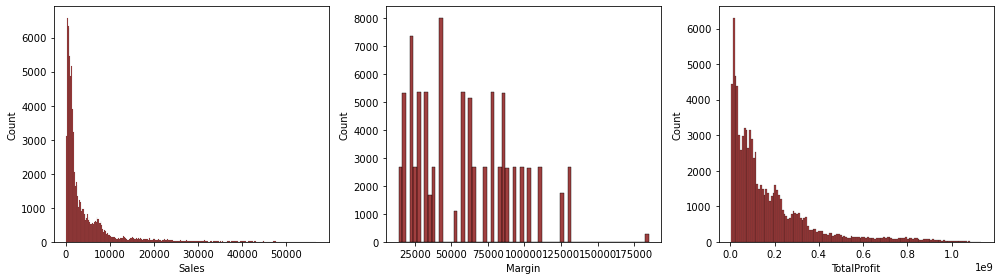

In [35]:
#draw kde plot to see each column distribution
plt.figure(figsize=(14, 4))

for i in range(len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.histplot(x=clientsales_df[nums[i]], color='maroon')
    plt.xlabel(nums[i])
    plt.tight_layout()

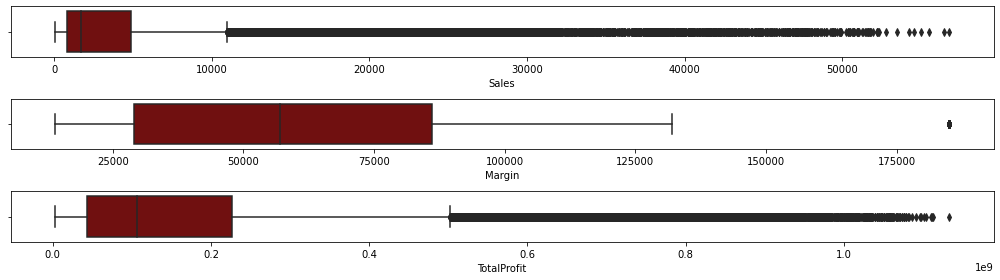

In [36]:
#plot boxplot to detect outliers
plt.figure(figsize=(14, 4))

for i in range(len(nums)):
    plt.subplot(len(nums), 1, i+1)
    sns.boxplot(x=clientsales_df[nums[i]], color='maroon')
    plt.tight_layout()

**Observation:**

* Sales data is clearly much right skewed which tells that most of the day, each product from each brand is sold around 1697 sales. We take the median value since the data is asymmetrical and highly skewed.

* There are several peaks shown in margin data, since it tells the margin for each product and brand (before multiplied by sales number). We should observe further the margin range between each product category. 

* Since TotalProfit is obtained by multiplying margin and sales number. TotalProfit will be highly correlated by Sales value, that lead the data become much right-skewed. From data, most of the day, the profit got from each product from each brand is around 1 hundred million Rupiahs.

We need analyze these numbers further.

**Categorical Columns**

In [24]:
#statistical summary for categorical columns
clientsales_df[cats].describe()

,Date,Category,Maker,Identifier
count,89498,89498,89498,89498
unique,2783,10,16,36
top,2020-05-05 00:00:00,Ovens & Cooktops,Funami,LFIEXBAPFQ
freq,36,13354,10711,2689
first,2010-02-15 00:00:00,NaN,NaN,NaN
last,2021-04-29 00:00:00,NaN,NaN,NaN


In [25]:
for col in cats:
    print('Value counts of',col, '\n', clientsales_df[col].value_counts(), '\n')

Value counts of Date 
 2020-05-05    36
2020-08-14    36
2020-09-09    36
2020-09-10    36
2020-09-21    36
              ..
2010-08-31    25
2010-10-08    25
2010-04-05    25
2010-08-12    24
2019-06-19     4
Name: Date, Length: 2783, dtype: int64 

Value counts of Category 
 Ovens & Cooktops    13354
Refrigerators       10699
Vacuum Cleaners     10684
Rice Cookers        10681
Televisions         10049
Air Conditioners     7981
Dishwashers          7869
Water Heaters        7490
Water Pumps          5363
Washers & Dryers     5328
Name: Category, dtype: int64 

Value counts of Maker 
 Funami       10711
Akaza         8021
Toshino       8015
Shimada       7974
Omuro         7354
Ikeda         7028
Nanase        5610
Sugiura       5360
Katayama      5353
Furutani      5343
Matsumoto     5185
Yoshikawa     3771
Hisami        2675
Okamoto       2674
Hayashida     2663
Kikuma        1761
Name: Maker, dtype: int64 

Value counts of Identifier 
 LFIEXBAPFQ    2689
AVXSMNNRDX    2688
UPJKNMID

**Observation:**

Before compiling further observation, we should keep in mind that stats and value counts above count the data's number of appearance. The more it appears, the most consistent it is sold daily. It does not always mean higher sales number.

* There are 10 different product category were sold by the client.

* There are 16 different product brands were traded by the client.

**Deep Dive Questions**

**Which Product Category is the Most Sold in History?**

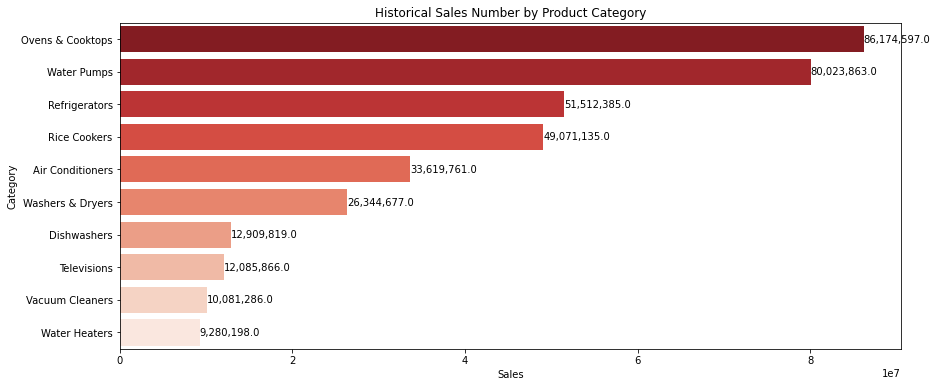

In [49]:
# group data by product category and sum the sales number
category_sales = clientsales_df.groupby('Category')['Sales'].sum().sort_values(ascending=False).reset_index()

# create a barplot using Seaborn
plt.figure(figsize=(14, 6))
palette = sns.color_palette("Reds_r", n_colors=10)
ax = sns.barplot(x="Sales", y="Category", data=category_sales, palette=palette)

# add labels to bars
for i, p in enumerate(ax.containers):
    ax.bar_label(p, labels=[f"{x:,}" for x in category_sales['Sales']], label_type='edge')

# set the title of the plot
plt.title("Historical Sales Number by Product Category")

# show the plot
plt.show()

**Which Product Maker/Brand is the Most Sold in History?**

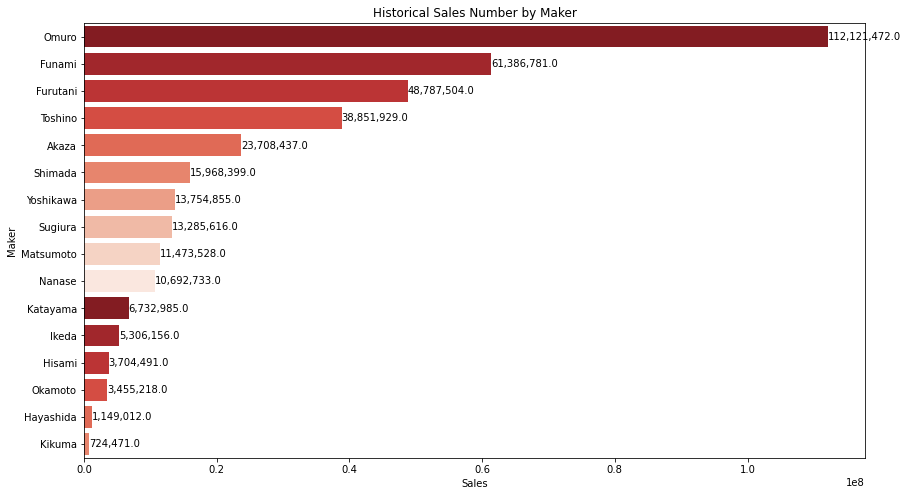

In [52]:
# group data by product maker and sum the sales number
maker_sales = clientsales_df.groupby('Maker')['Sales'].sum().sort_values(ascending=False).reset_index()

# create a barplot using Seaborn
plt.figure(figsize=(14, 8))
palette = sns.color_palette("Reds_r", n_colors=10)
ax = sns.barplot(x="Sales", y="Maker", data=maker_sales, palette=palette)

# add labels to bars
for i, p in enumerate(ax.containers):
    ax.bar_label(p, labels=[f"{x:,}" for x in maker_sales['Sales']], label_type='edge')

# set the title of the plot
plt.title("Historical Sales Number by Maker")

# show the plot
plt.show()

**How Much are Historical Sales Number for Each Product?**

In [371]:
# group data by product (category + maker) and sum the sales number
product_sales = clientsales_df.copy()
product_sales['Category_Maker'] = product_sales['Category'] + ' ' + product_sales['Maker']
product_sales = product_sales.groupby('Category_Maker')['Sales'].sum().sort_values(ascending=False).reset_index()

product_sales

,Category_Maker,Sales
0,Ovens & Cooktops Omuro,65211149.0
1,Water Pumps Funami,49415418.0
2,Refrigerators Omuro,43789799.0
3,Water Pumps Furutani,30608445.0
4,Washers & Dryers Akaza,18195886.0
5,Rice Cookers Furutani,18179059.0
6,Rice Cookers Toshino,17531891.0
7,Air Conditioners Toshino,13802803.0
8,Air Conditioners Yoshikawa,13349446.0
9,Rice Cookers Matsumoto,10122088.0


**What are the Top 10 Most Sold Products?** 

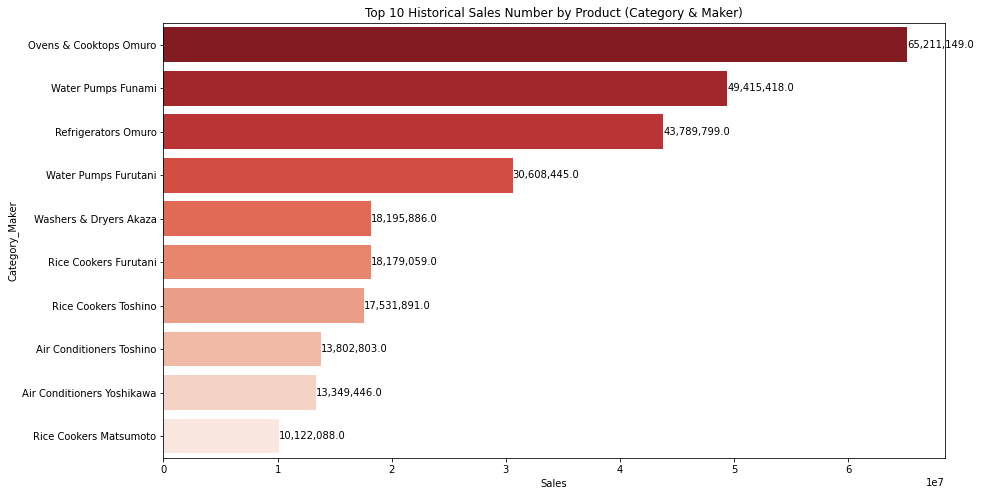

In [59]:
#show Top 10 product
top10product_sales = product_sales.head(10)

# create a barplot using Seaborn
plt.figure(figsize=(14, 8))
palette = sns.color_palette("Reds_r", n_colors=10)
ax = sns.barplot(x="Sales", y="Category_Maker", data=top10product_sales, palette=palette)

# add labels to bars
for i, p in enumerate(ax.containers):
    ax.bar_label(p, labels=[f"{x:,}" for x in top10product_sales['Sales']], label_type='edge')

# set the title of the plot
plt.title("Top 10 Historical Sales Number by Product (Category & Maker)")

# show the plot
plt.show()

**And What are the Least Sold Products?**

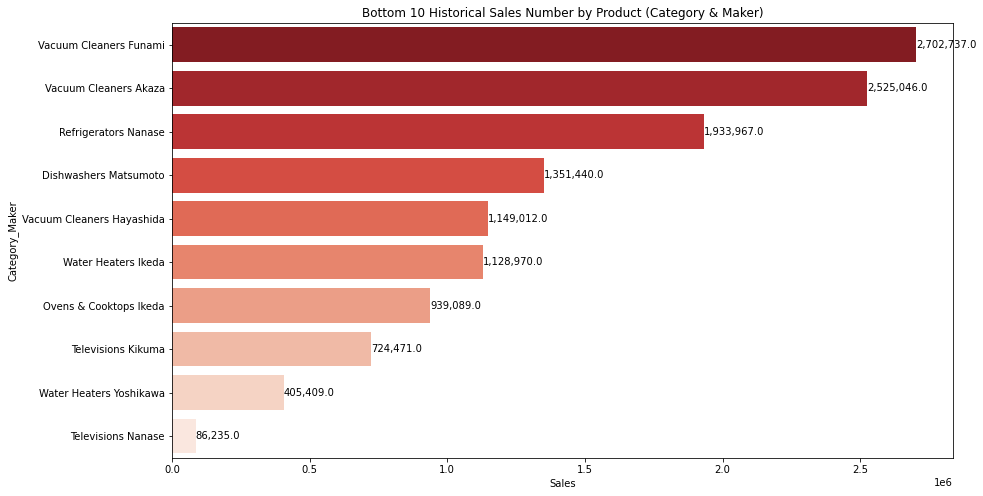

In [60]:
#show Bottom 10 product
bottom10product_sales = product_sales.tail(10)

# create a barplot using Seaborn
plt.figure(figsize=(14, 8))
palette = sns.color_palette("Reds_r", n_colors=10)
ax = sns.barplot(x="Sales", y="Category_Maker", data=bottom10product_sales, palette=palette)

# add labels to bars
for i, p in enumerate(ax.containers):
    ax.bar_label(p, labels=[f"{x:,}" for x in bottom10product_sales['Sales']], label_type='edge')

# set the title of the plot
plt.title("Bottom 10 Historical Sales Number by Product (Category & Maker)")

# show the plot
plt.show()

**Which Product Category is the Most Profitable in the Past 3 Years?**

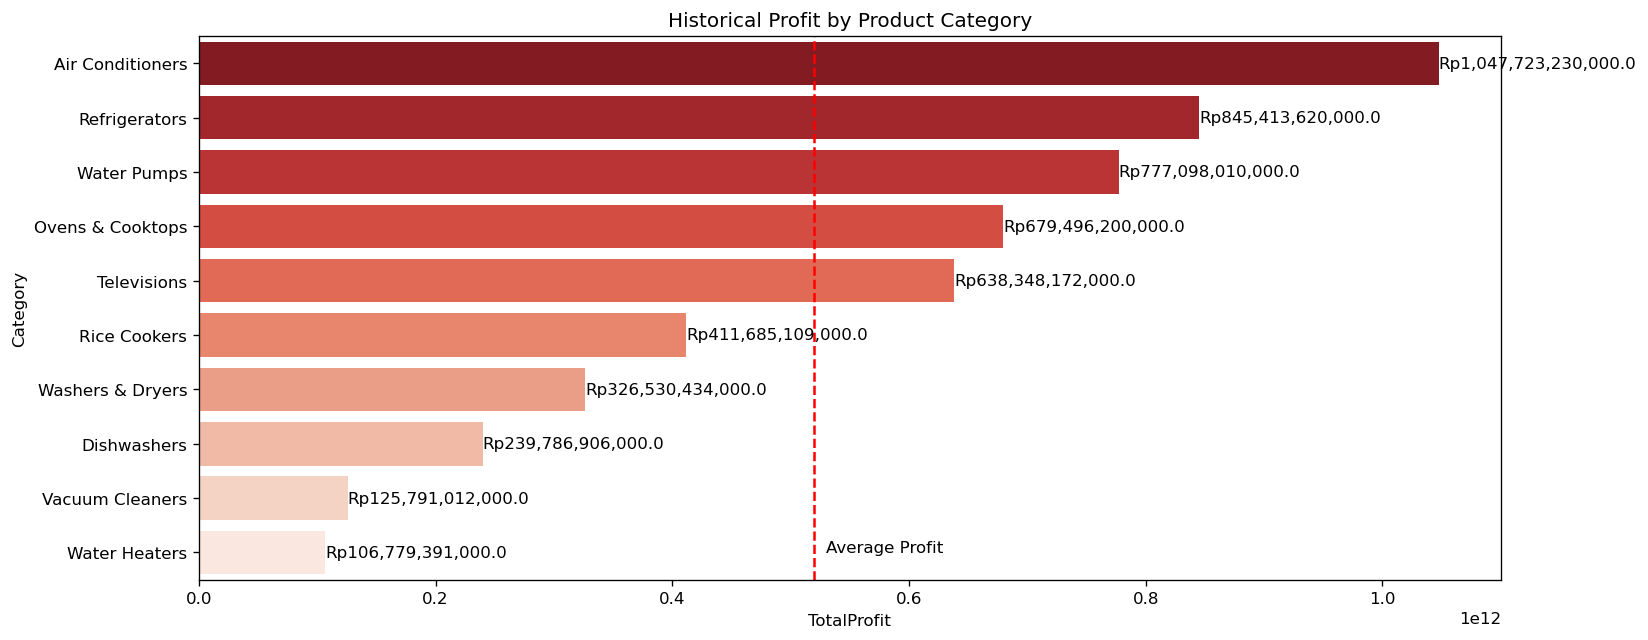

In [390]:
# group data by product category and sum the total profit from the Past 3 years
category_profit = clientsales_df[clientsales_df['Date'].dt.year >= 2018].groupby('Category')['TotalProfit'].sum().sort_values(ascending=False).reset_index()

# create a barplot using Seaborn
plt.figure(figsize=(14, 6))
palette = sns.color_palette("Reds_r", n_colors=10)
ax = sns.barplot(x="TotalProfit", y="Category", data=category_profit, palette=palette)

# add labels to bars
for i, p in enumerate(ax.containers):
    ax.bar_label(p, labels=['Rp'f"{x:,}" for x in category_profit['TotalProfit']], label_type='edge')

plt.axvline(x=category_profit['TotalProfit'].mean(), color='red', linestyle='--')
# add a text label beside the line
plt.text(category_profit['TotalProfit'].mean()+1e10, 9, 'Average Profit', rotation=0)
# set the title of the plot
plt.title("Historical Profit by Product Category")
plt.savefig('categorymostprofit.png')
# show the plot
plt.show()

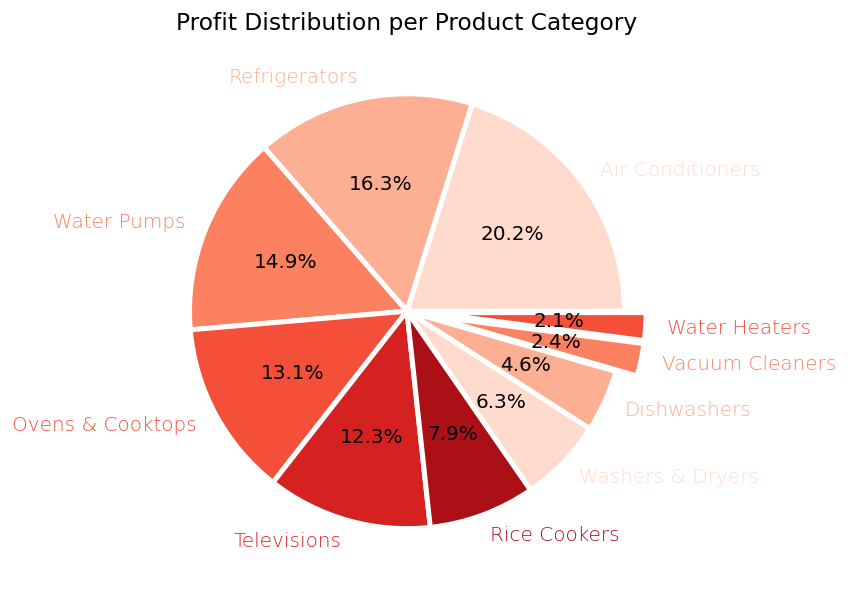

In [391]:
#create a pie chart
subset = pd.DataFrame(category_profit).reset_index()

plt.figure(figsize=(12,6))
patches, texts, pcts = plt.pie(x=subset['TotalProfit'], labels=subset['Category'], explode=(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1), autopct='%1.1f%%', 
        colors=sns.color_palette("Reds"), wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}, textprops={'size': 'large'})
# For each wedge, set the corresponding text label color to the wedge's
# face color.
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='black')
plt.setp(texts, fontweight=100)
plt.title("Profit Distribution per Product Category", fontsize=14)
plt.savefig('categoryprofitdist.png')
plt.show()

**Which Product Maker/Brand is the Most Profitable in the Past 3 Years?**

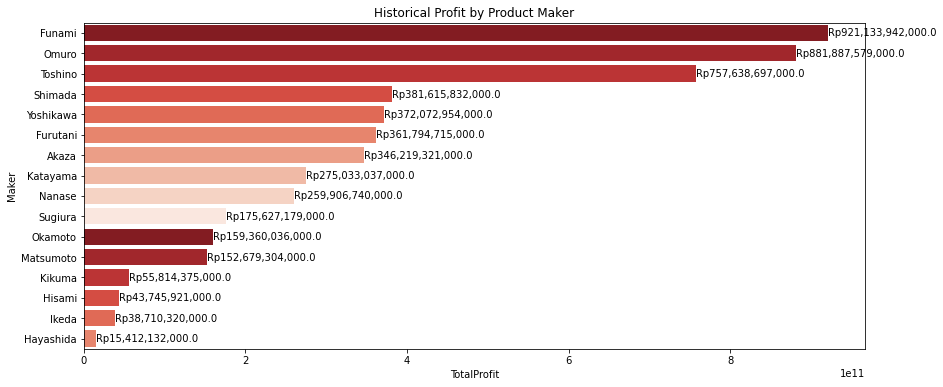

In [77]:
# group data by product maker and sum the total profit from the Past 3 years
maker_profit = clientsales_df[clientsales_df['Date'].dt.year >= 2018].groupby('Maker')['TotalProfit'].sum().sort_values(ascending=False).reset_index()

# create a barplot using Seaborn
plt.figure(figsize=(14, 6))
palette = sns.color_palette("Reds_r", n_colors=10)
ax = sns.barplot(x="TotalProfit", y="Maker", data=maker_profit, palette=palette)

# add labels to bars
for i, p in enumerate(ax.containers):
    ax.bar_label(p, labels=['Rp'f"{x:,}" for x in maker_profit['TotalProfit']], label_type='edge')

# set the title of the plot
plt.title("Historical Profit by Product Maker")

# show the plot
plt.show()

**How Much are Recent Profit for Each Product in the Past 3 Years?**

In [33]:
# group data by product (category + maker) and sum the profit
product_profit = clientsales_df.copy()
product_profit['Category_Maker'] = product_profit['Category'] + ' ' + product_profit['Maker']
product_profit = product_profit[product_profit['Date'].dt.year >= 2018].groupby('Category_Maker')['TotalProfit'].sum().sort_values(ascending=False).reset_index()

product_profit

,Category_Maker,TotalProfit
0,Refrigerators Omuro,5.940460e+11
1,Water Pumps Funami,5.759707e+11
2,Air Conditioners Toshino,4.675121e+11
3,Air Conditioners Yoshikawa,3.588061e+11
4,Ovens & Cooktops Omuro,2.592962e+11
5,Televisions Katayama,2.296400e+11
6,Washers & Dryers Akaza,2.226890e+11
7,Air Conditioners Funami,2.214051e+11
8,Water Pumps Furutani,2.011273e+11
9,Ovens & Cooktops Toshino,1.891544e+11


**What are the Top 10 Most Profitable Products?** 

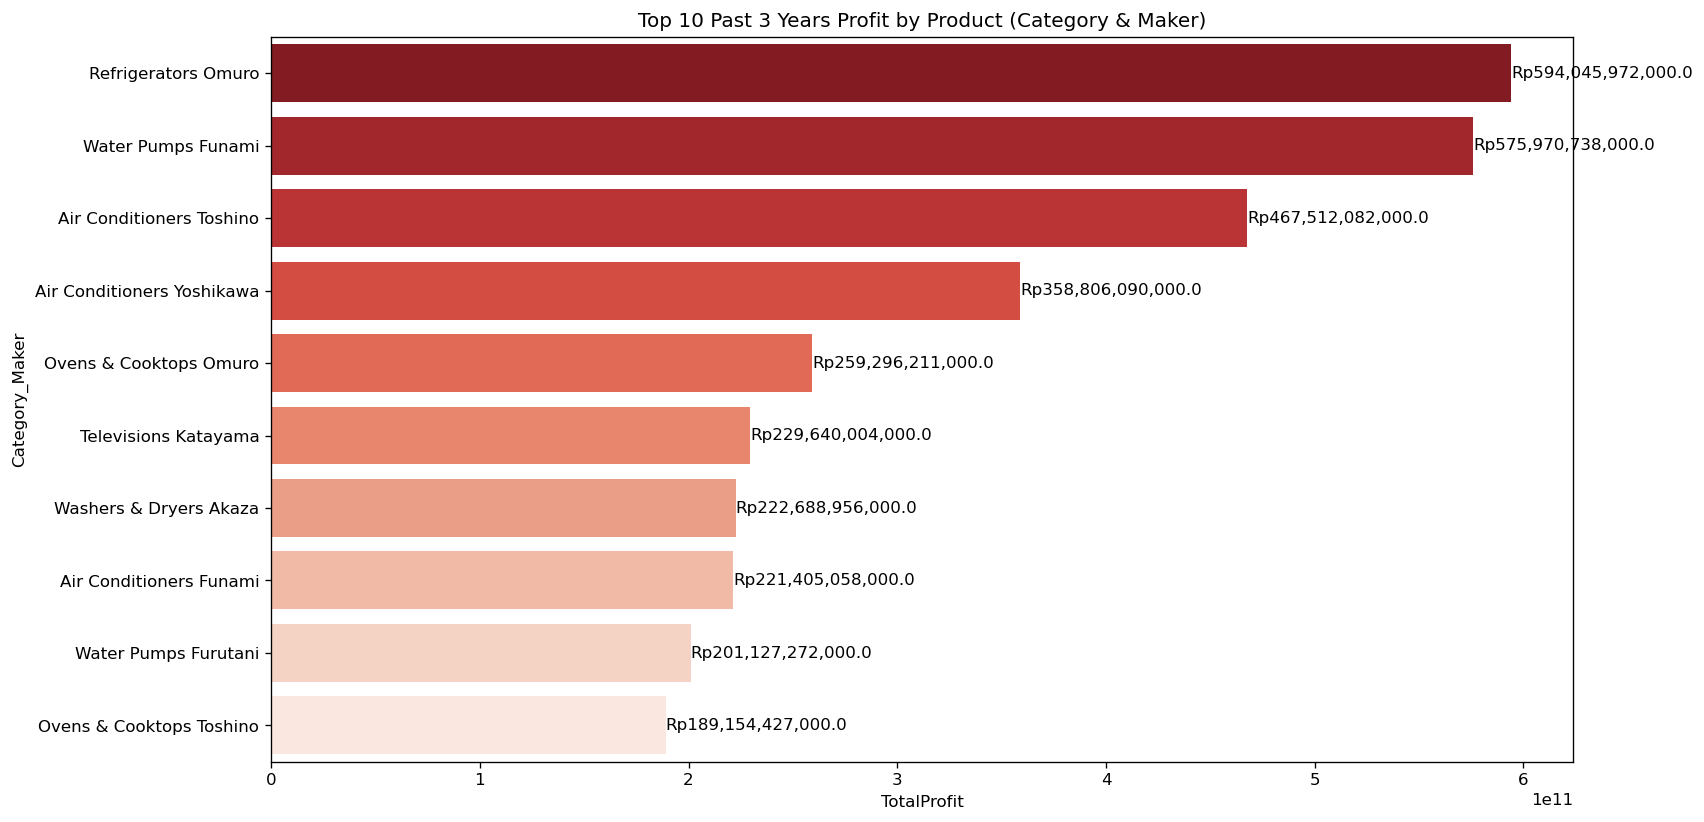

In [346]:
#show Top 10 product
top10product_profit = product_profit.head(10)

# create a barplot using Seaborn
plt.figure(figsize=(14, 8))
palette = sns.color_palette("Reds_r", n_colors=10)
ax = sns.barplot(x="TotalProfit", y="Category_Maker", data=top10product_profit, palette=palette)

# add labels to bars
for i, p in enumerate(ax.containers):
    ax.bar_label(p, labels=['Rp'f"{x:,}" for x in top10product_profit['TotalProfit']], label_type='edge')

# set the title of the plot
plt.title("Top 10 Past 3 Years Profit by Product (Category & Maker)")

# show the plot
plt.show()

**What are the Top 10 Least Profitable Products?** 

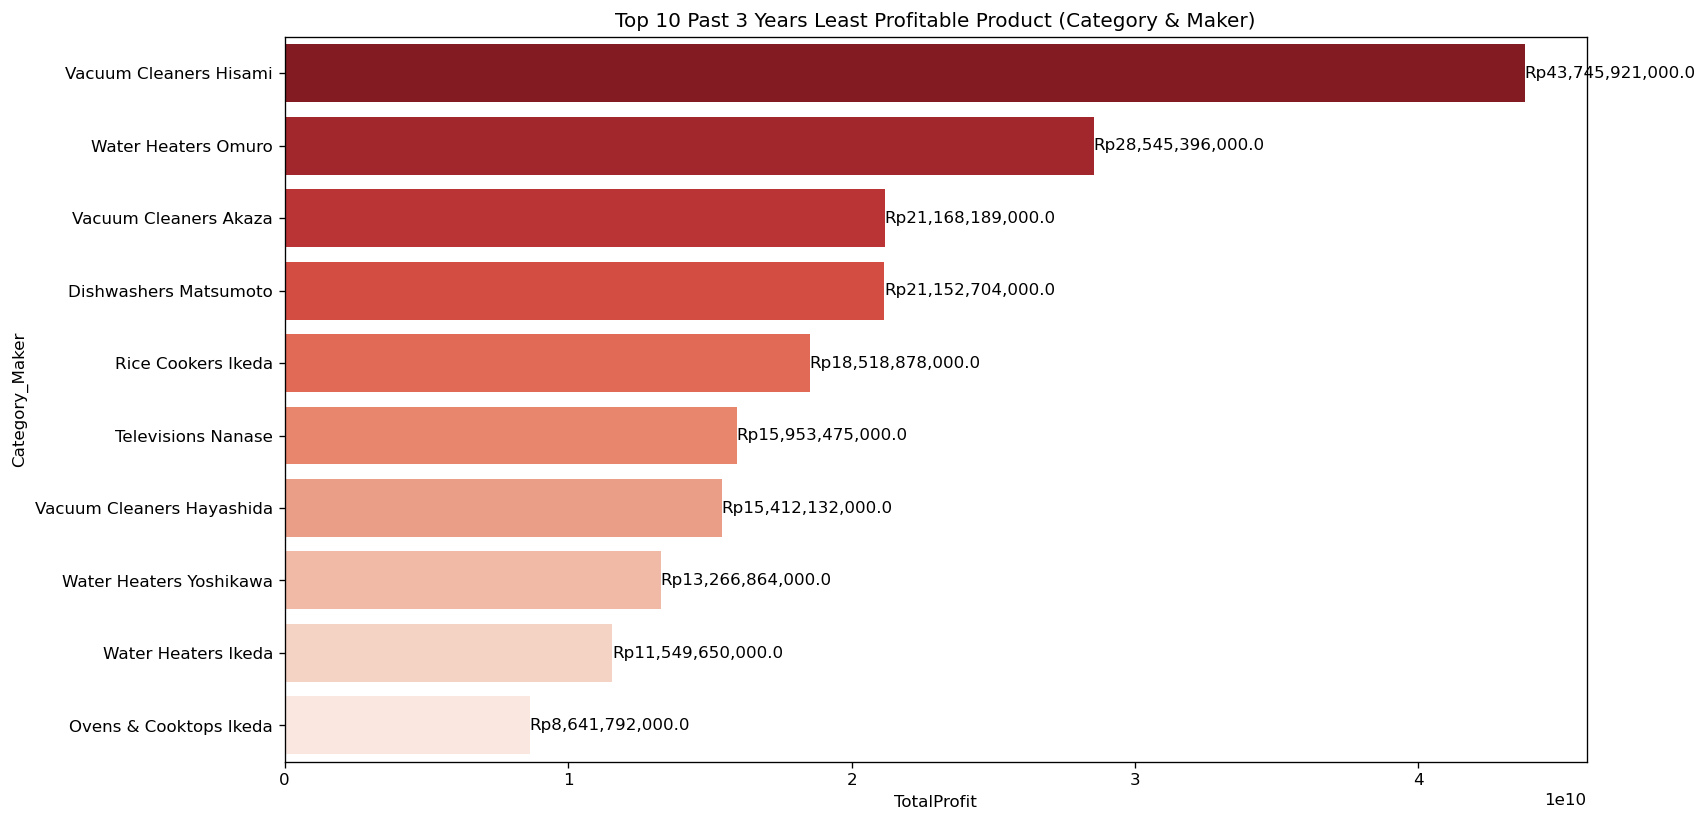

In [392]:
#show Bottom 10 product
bottom10product_profit = product_profit.tail(10)

# create a barplot using Seaborn
plt.figure(figsize=(14, 8))
palette = sns.color_palette("Reds_r", n_colors=10)
ax = sns.barplot(x="TotalProfit", y="Category_Maker", data=bottom10product_profit, palette=palette)

# add labels to bars
for i, p in enumerate(ax.containers):
    ax.bar_label(p, labels=['Rp'f"{x:,}" for x in bottom10product_profit['TotalProfit']], label_type='edge')

# set the title of the plot
plt.title("Top 10 Past 3 Years Least Profitable Product (Category & Maker)")
plt.savefig('productleastprofit.png')
# show the plot
plt.show()

In [378]:
sumall = product_sales['Sales'].sum()
product_sales['Sales'][product_sales['Category_Maker'].isin(bottom10product_profit['Category_Maker'])].sum()/ product_sales['Sales'].sum()

0.0475562986137345

In [379]:
product_profit['TotalProfit'][product_profit['Category_Maker'].isin(bottom10product_profit['Category_Maker'])].sum()/ product_profit['TotalProfit'].sum()

0.03807813983344841

**How are the Sales Growth by All-Time History for Each Product Category?**

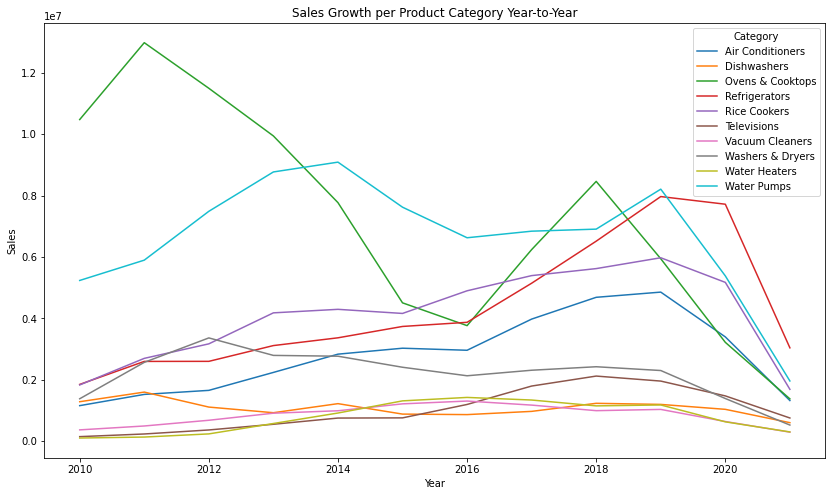

In [87]:
category_sales2 = clientsales_df[['Date', 'Category', 'Sales']]
category_sales2['Year'] = category_sales2['Date'].dt.year

#Group the data by product category and year and sum the sales
grouped_df = category_sales2.groupby(['Category', 'Year'])['Sales'].sum().reset_index()

# Use Seaborn's lineplot() function to create the line graph
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Sales', hue='Category', data=grouped_df, markers=True, sort=True, legend='brief')
plt.title('Sales Growth per Product Category Year-to-Year')

# Show the plot
plt.show()

**How are the Profit Growth by the Past 3 Years for Each Product Category?**

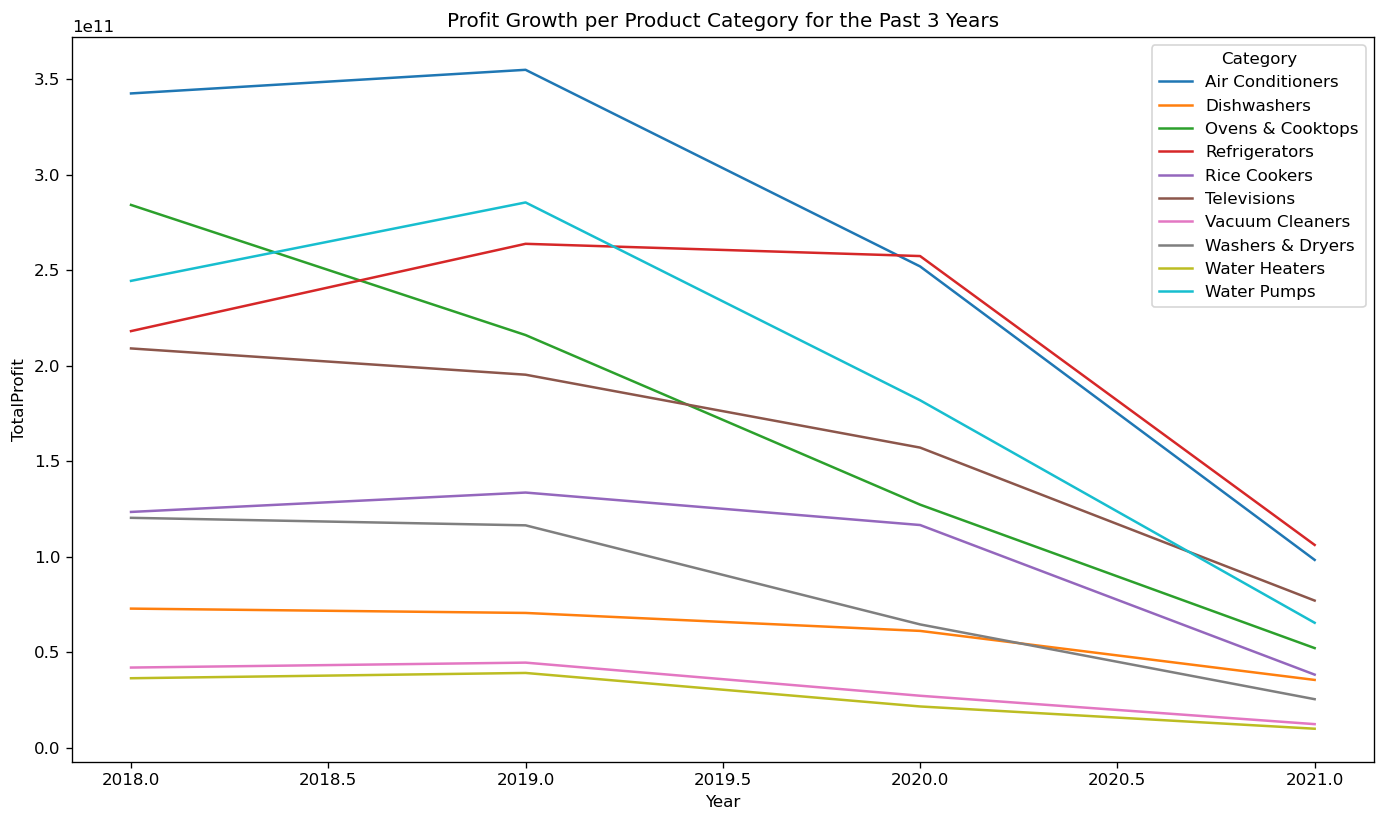

In [393]:
category_profit2 = clientsales_df[['Date', 'Category', 'TotalProfit']]
category_profit2['Year'] = category_profit2['Date'].dt.year

#Group the data by product category and year and sum the sales
grouped_df = category_profit2[category_profit2['Year'] >= 2018].groupby(['Category', 'Year'])['TotalProfit'].sum().reset_index()

# Use Seaborn's lineplot() function to create the line graph
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='TotalProfit', hue='Category', data=grouped_df, markers=True, sort=True, legend='brief')
plt.title('Profit Growth per Product Category for the Past 3 Years')
plt.savefig('profitgrowth.png')
# Show the plot
plt.show()

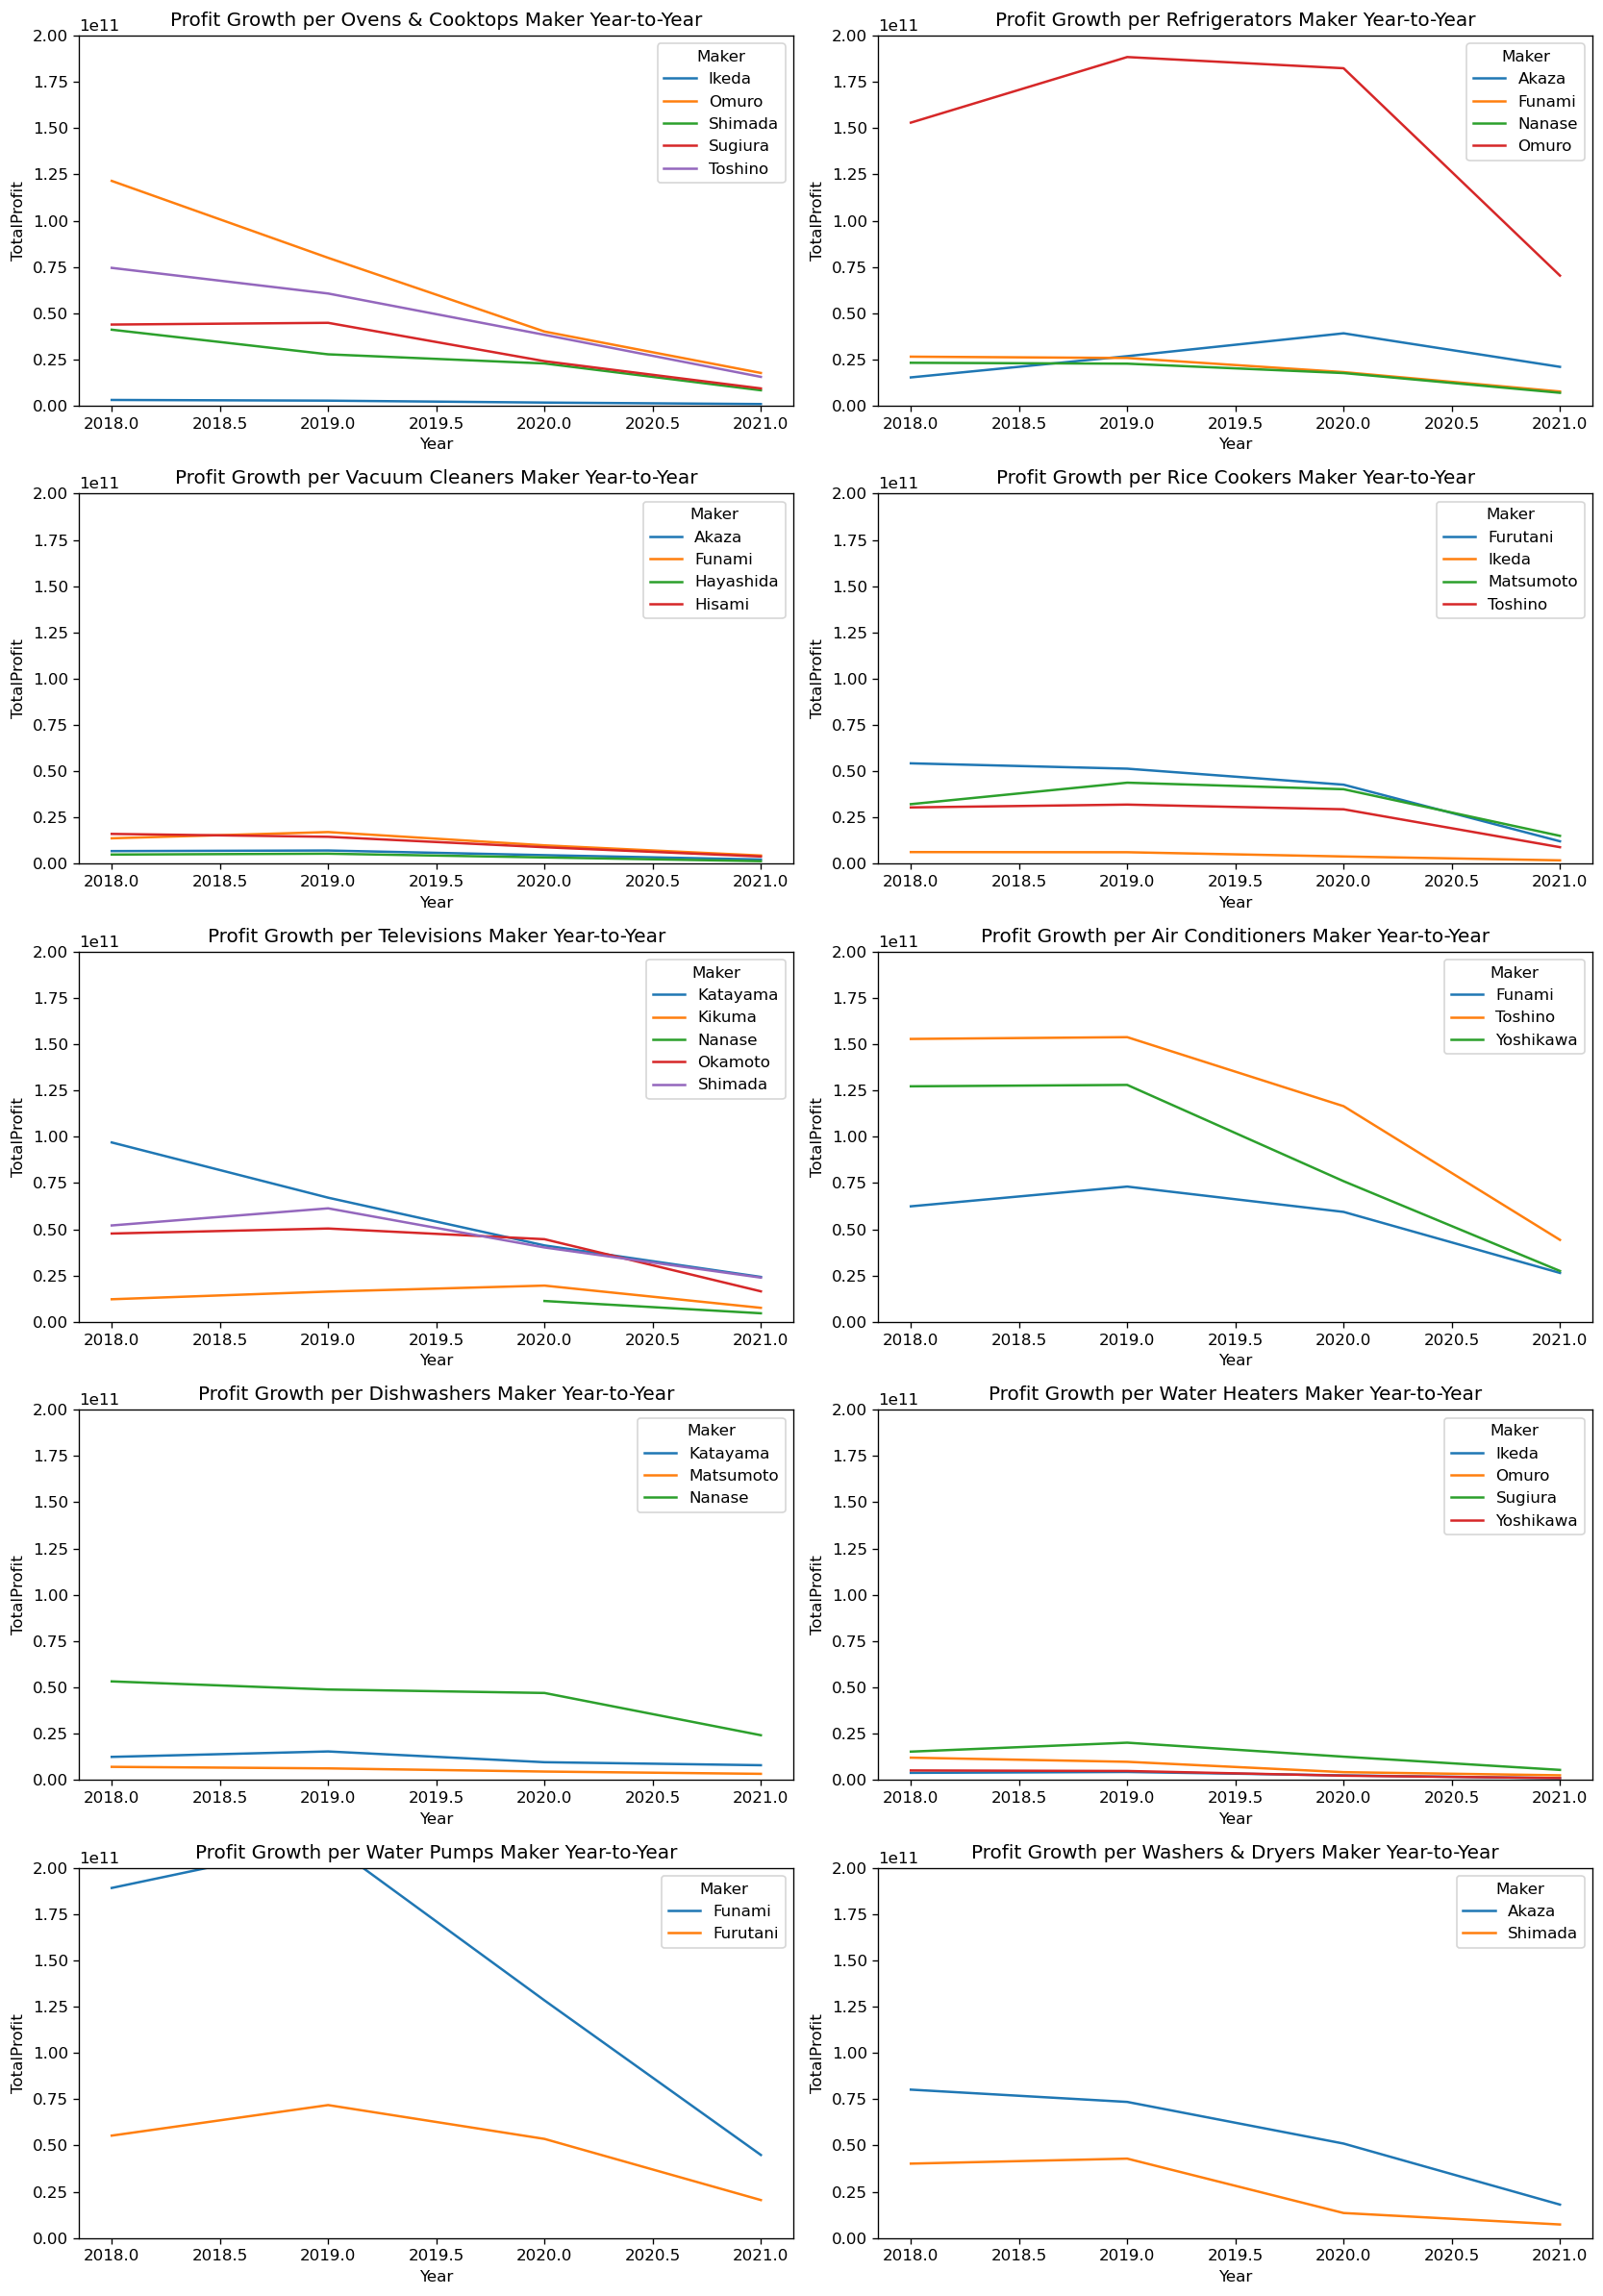

In [394]:
plt.figure(figsize=(14, 20))
category = ['Ovens & Cooktops', 'Refrigerators', 'Vacuum Cleaners', 'Rice Cookers', 'Televisions', 'Air Conditioners', 
            'Dishwashers', 'Water Heaters', 'Water Pumps', 'Washers & Dryers']

for i in range(0, 10):
    category_profit3 = clientsales_df[clientsales_df['Category'] == category[i]][['Date', 'Category', 'Maker', 'TotalProfit']]
    category_profit3['Year'] = category_profit3['Date'].dt.year
    
    #Group the data by product category and year and sum the sales
    grouped_df = category_profit3[category_profit3['Year'] >= 2018].groupby(['Maker', 'Year'])['TotalProfit'].sum().reset_index()
    
    # Use Seaborn's lineplot() function to create the line graph
    plt.subplot(5, 2, i+1)
    sns.lineplot(x='Year', y='TotalProfit', hue='Maker', data=grouped_df, markers=True, sort=True, legend='auto')
    plt.ylim(0,2e11)
    plt.title(f'Profit Growth per {category[i]} Maker Year-to-Year')
    plt.savefig(f'profit_{category[i]}.png')
    # Show the plot
    plt.tight_layout()

**Overall Sales Record**

Text(0, 0.5, 'Sales Number')

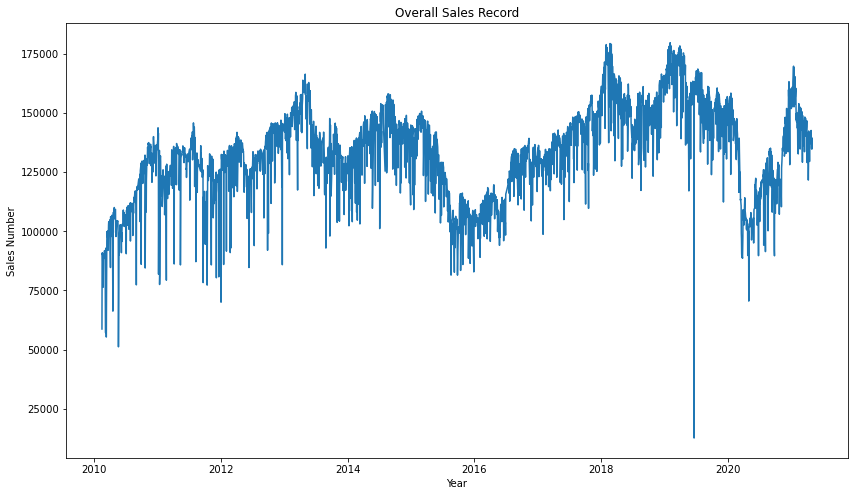

In [34]:
# group the data by date and sum the sales number
df_sales = clientsales_df.groupby('Date')[['Sales', 'TotalProfit']].sum().reset_index()

plt.figure(figsize=(14, 8))

#plot overall sales number record
plt.plot(df_sales['Date'], df_sales['Sales'])
plt.title('Overall Sales Record')
plt.xlabel('Year')
plt.ylabel('Sales Number')

**Current Year Sales Record**

Text(0, 0.5, 'Sales Number')

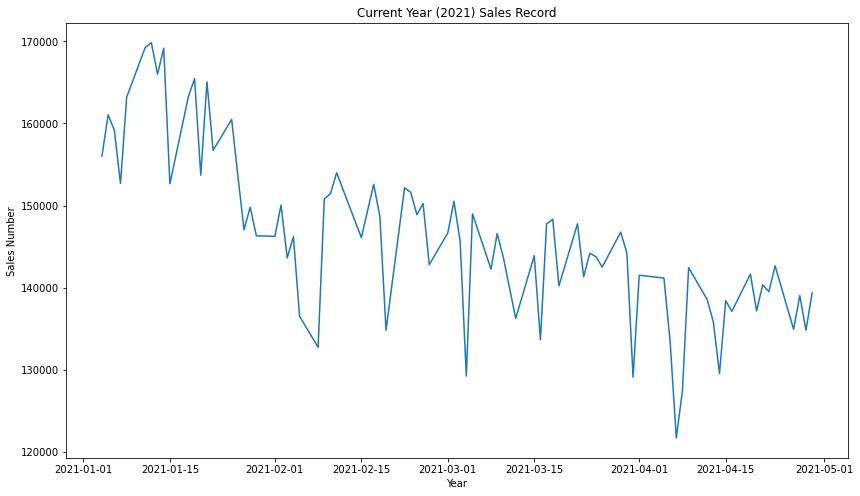

In [40]:
# group the data by date and sum the sales number
df_sales = clientsales_df[clientsales_df['Date'].dt.year == 2021].groupby('Date')[['Sales', 'TotalProfit']].sum().reset_index()

plt.figure(figsize=(14, 8))

#plot overall sales number record
plt.plot(df_sales['Date'], df_sales['Sales'])
plt.title('Current Year (2021) Sales Record')
plt.xlabel('Year')
plt.ylabel('Sales Number')

**Current Year (2021) Accumulative Sales Record**

Text(0, 0.5, 'Sales Number')

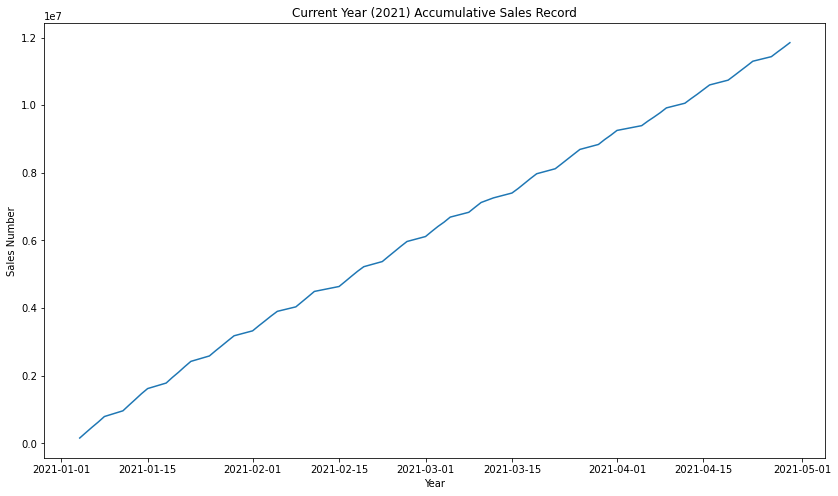

In [41]:
# group the data by date and sum the sales number
df_sales = clientsales_df[clientsales_df['Date'].dt.year == 2021].groupby('Date')[['Sales', 'TotalProfit']].sum().reset_index()
df_sales['AccumulativeSales'] = df_sales['Sales'].cumsum()

plt.figure(figsize=(14, 8))

#plot overall sales number record
plt.plot(df_sales['Date'], df_sales['AccumulativeSales'])
plt.title('Current Year (2021) Accumulative Sales Record')
plt.xlabel('Year')
plt.ylabel('Sales Number')

**Overall Profit Record**

Text(0, 0.5, 'Total Profit')

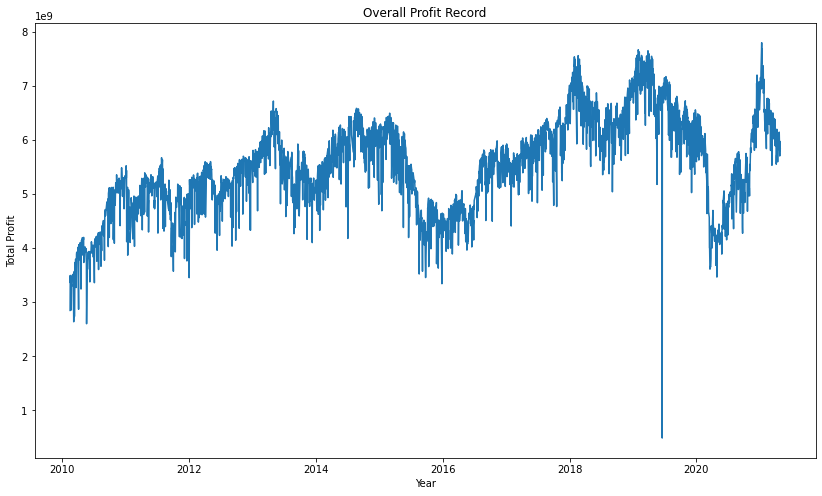

In [89]:
# group the data by date and sum the sales number
df_sales = clientsales_df.groupby('Date')[['Sales', 'TotalProfit']].sum().reset_index()

plt.figure(figsize=(14, 8))

#plot overall sales number record
plt.plot(df_sales['Date'], df_sales['TotalProfit'])
plt.title('Overall Profit Record')
plt.xlabel('Year')
plt.ylabel('Total Profit')

### Data Preprocessing

**Feature Selection**

For further machine learning modelling, we have to select the right feature and target to run the forecasting. Since we have a time series data and our purpose here is to predict the future sales numbers. So we only need `Date` and `Sales` column.

In [320]:
# group the data by date and sum the sales number
worksales_df = clientsales_df.groupby('Date')['Sales'].sum().reset_index()

#Convert date column to datetime format and set it as the index
worksales_df.set_index('Date', inplace=True)

#Resample to weekly frequency
weeklysales_df = worksales_df.resample('W').sum() 

# Split the dataset into train and test
train_size = int(len(worksales_df) * 0.8)
df_train, df_test = worksales_df[:train_size], worksales_df[train_size:]

**Trends and Seasonality**

Text(0, 0.5, 'Sales Number')

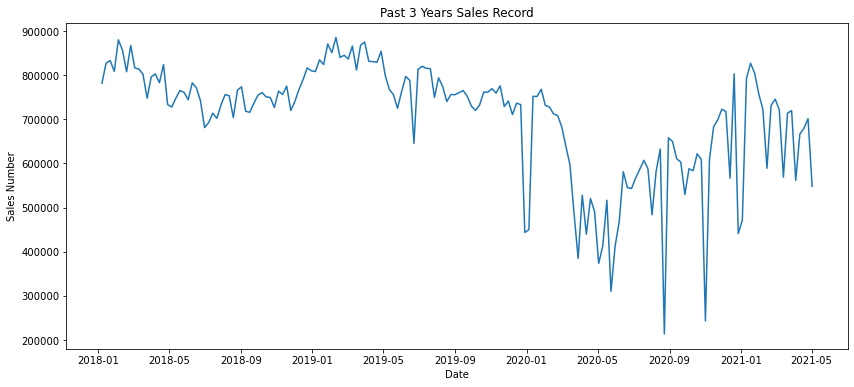

In [300]:
# group the data by date and sum the sales number
weeklysales_dfnow = weeklysales_df[weeklysales_df.index.year >=2018]

plt.figure(figsize=(14, 6))

#plot overall sales number record
plt.plot(weeklysales_dfnow.index, weeklysales_dfnow['Sales'])
plt.title('Past 3 Years Sales Record')
plt.xlabel('Date')
plt.ylabel('Sales Number')

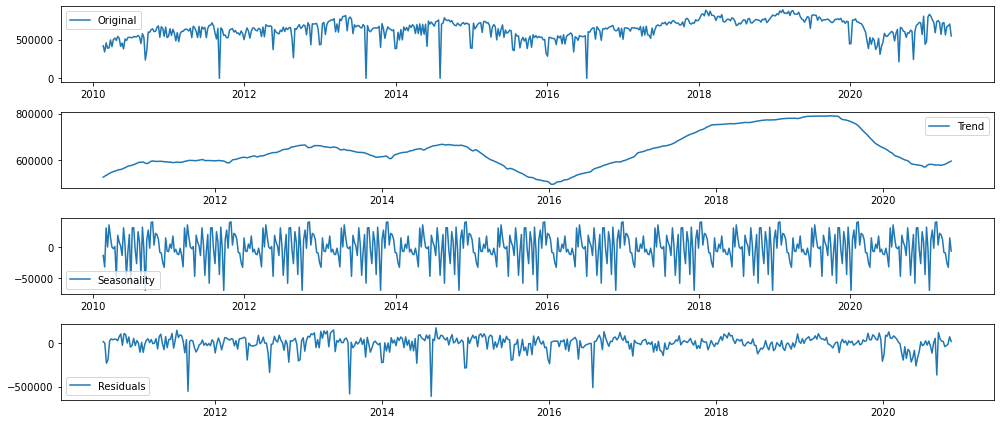

In [301]:
#Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(weeklysales_df['Sales'], period=54) # assuming seasonal period of 12 months
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 6))

plt.subplot(411)
plt.plot(weeklysales_df['Sales'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

**Observation**

* `Seasonality`:

We can see there is a slight seasonal sign in the past 3 years. The sales gradually decrease and hit its bottom in May-June and reach another peak in the end of the year. Means the busiest transaction or sales usually occur before and after New Year.

* `Trends`:

There is no specific trend that can be inferred from the Sales graph, shows that currently the business has been in steady performance, though the pandemic hits hard, affecting dramatic declination in sales number which fortunately has been recovered with a good sign towards the end of the 2020 year.

## 3. Demonstrate a method for predicting the client’s future sales numbers.

Sales forecasting is the process of predicting future sales of a product or service. Accurate sales forecasting is essential for businesses to plan their operations, manage inventory, and make informed decisions about marketing and resource allocation. There are many algorithms used for sales forecasting, including time series models, such as ARIMA and exponential smoothing, and machine learning algorithms, such as regression analysis, decision trees, and neural networks. Time series models are widely used for sales forecasting as they are designed specifically for analyzing time-dependent data and can capture seasonality and trends in sales data. 

When choosing to use the ARIMA algorithm for sales forecasting, it's important to pay attention to the order of the model. The order of the ARIMA model is represented by the notation (p, d, q), where 

* p is the number of autoregressive terms, 

* d is the number of nonseasonal differences, and 

* q is the number of moving average terms. 

To determine the order of the model, we can use methods such as autocorrelation and partial autocorrelation plots or the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) to compare different models. It's important to note that ARIMA models assume that the data is stationary, so we may need to perform differencing to make the data stationary. Due to limited time to use more algorithms and compare them, ARIMA is a good choice as it is a popular and widely used algorithm for time series forecasting and can capture trends and seasonality in the data.

**Check for Stationarity**

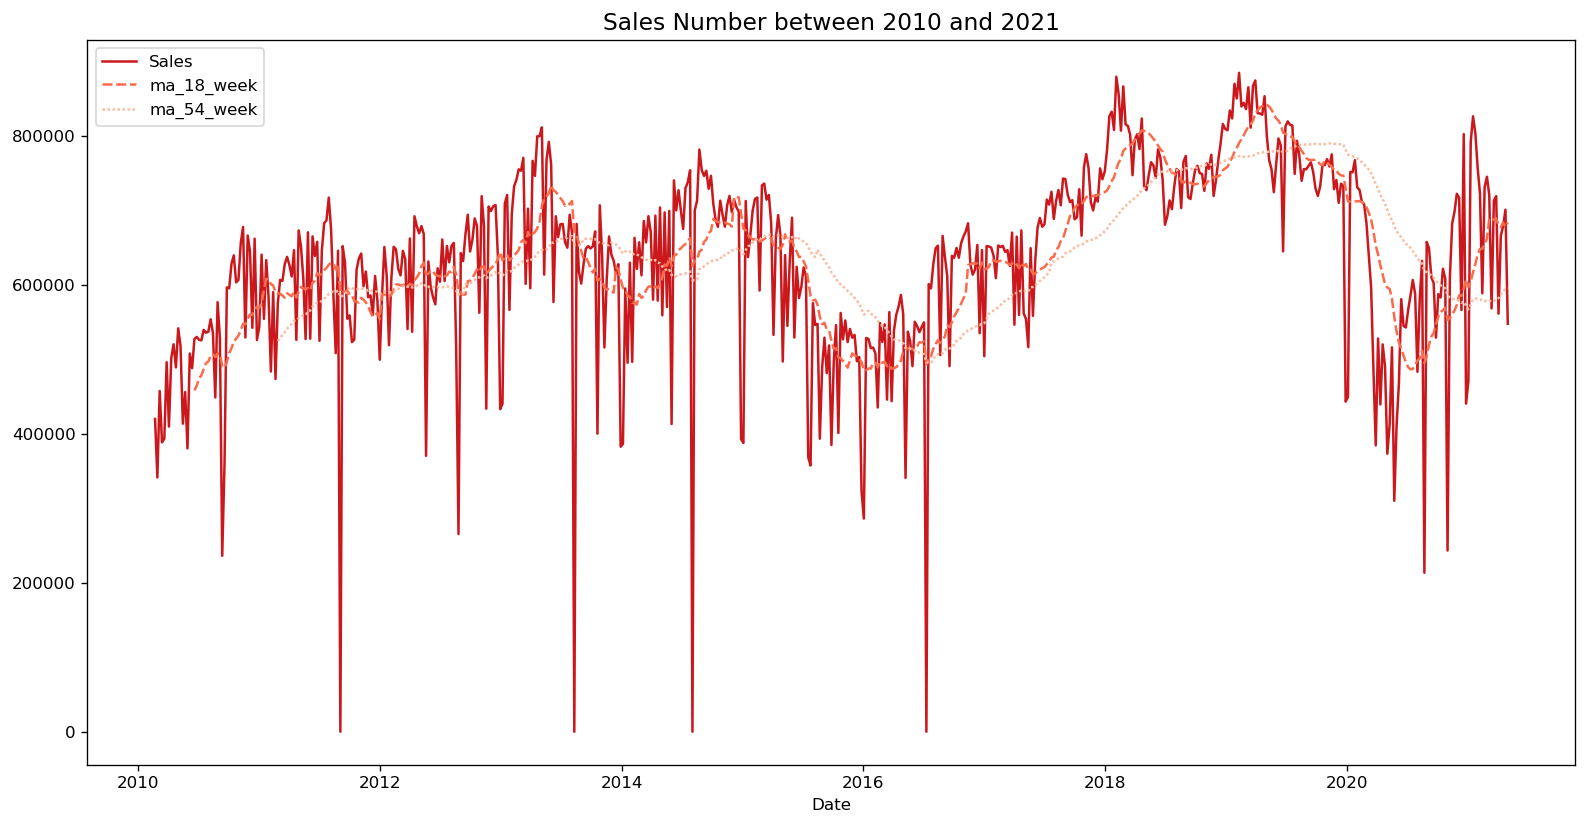

ADF Statistic: -3.6449034811734395
p-value: 0.05214714534222171


In [384]:
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df_sales, title_string, labels):
    # Visualize the data
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title(title_string, fontsize=14)
    if df_sales.index.size > 12:
        df_sales['ma_18_week'] = df_sales['Sales'].rolling(window=18).mean()
        df_sales['ma_54_week'] = df_sales['Sales'].rolling(window=54).mean()
        sns.lineplot(data=df_sales[['Sales', 'ma_18_week', 'ma_54_week']], palette=sns.color_palette("Reds_r", 3))
        plt.legend(loc='upper left', labels=labels)
    else:
        sns.lineplot(data=df_sales[['Sales']])
    plt.savefig('stationaritycheck.png')
    plt.show()
    
    sales = df_sales['Sales'].dropna()
    # Perform an Ad Fuller Test
    # the default alpha = .05 stands for a 95% confidence interval
    #adf_test = pm.arima.ADFTest(alpha = 0.05) 
    #print(adf_test.should_diff(sales))
    
    adf_test = adfuller(sales)
    p_value = adf_test[1]
    print('ADF Statistic:', result[0])
    print('p-value:', p_value)
    #if p_value > 0.05:
    #    print('The data is not stationary.')
    #else:
    #    print('The data is stationary.')

    
df_sales1 = pd.DataFrame(weeklysales_df['Sales'], columns=['Sales'])
df_sales1.index = weeklysales_df.index 
title = "Sales Number between 2010 and 2021"
labels = ['Sales', 'ma_18_week', 'ma_54_week']
check_stationarity(df_sales1, title, labels)

**Hyperparameter Tuning**

In [322]:
# auto_arima
model_fit = pm.auto_arima(weeklysales_df, test='adf', 
                         max_p=3, max_d=3, max_q=3, 
                         seasonal=True, m=12,
                         max_P=3, max_D=2, max_Q=3,
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

# summarize the model characteristics
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=15081.127, Time=6.88 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=15340.588, Time=0.17 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=15200.994, Time=0.95 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=15079.950, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=15338.591, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=15079.352, Time=0.34 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=15080.134, Time=0.80 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=15080.312, Time=1.94 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=15080.051, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=15079.095, Time=0.48 sec
 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=15079.664, Time=0.99 sec
 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=15079.518, Time=1.06 sec
 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=15080.810, Time=2.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=15081.018, Time=1.50 sec
 ARIM

### Modelling

In [323]:
mod = sm.tsa.statespace.SARIMAX(weeklysales_df,
                                order=(0, 1, 2),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8005      0.033    -24.373      0.000      -0.865      -0.736
ma.L2         -0.0214      0.038     -0.557      0.578      -0.097       0.054
ma.S.L12      -0.0550      0.050     -1.108      0.268      -0.152       0.042
ma.S.L24      -0.0775      0.066     -1.174      0.240      -0.207       0.052
ma.S.L36      -0.0669      0.055     -1.210      0.226      -0.175       0.041
sigma2      9.726e+09   6.71e-12   1.45e+21      0.000    9.73e+09    9.73e+09


<Figure size 1680x720 with 0 Axes>

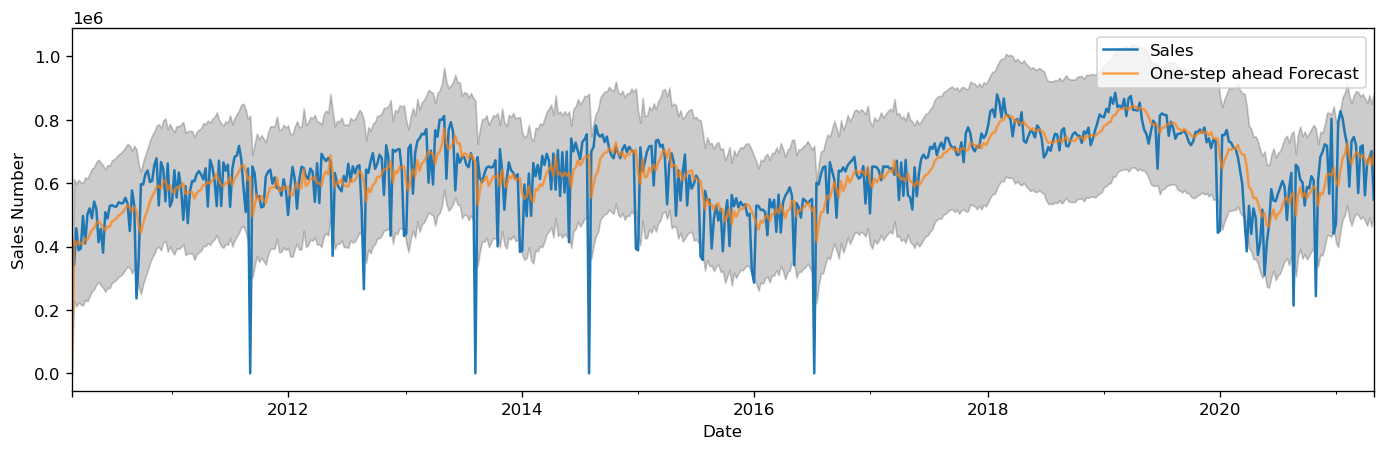

The Mean Squared Error is 9458556739.2
The Root Mean Squared Error is 97255.11
R score: 0.6594624930473034


In [385]:
pred = results.get_prediction(start=pd.to_datetime('2010-02-21'), dynamic=False)
pred_ci = pred.conf_int()
plt.figure(figsize=(14,6))
ax = weeklysales_df['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales Number')
plt.legend()
plt.savefig('Sales Forecast.png')
plt.show()

#Calculate Error
y_forecasted = pred.predicted_mean
y_truth = weeklysales_df['Sales']

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error is {}'.format(round(np.sqrt(mse), 2)))

r = np.corrcoef(y_truth, y_forecasted)[0, 1]
print("R score:", r)

In [387]:
import numpy as np
from sklearn.metrics import mean_squared_error

# calculate the mean benchmark
mean_benchmark = np.mean(y_truth)
print('Mean Benchmark =', mean_benchmark)

#Calculate Error
y_forecasted = pred.predicted_mean
y_truth = weeklysales_df['Sales']

# calculate the MSE and RMSE
mse = mean_squared_error(y_truth, y_forecasted)
rmse = mean_squared_error(y_truth, y_forecasted, squared=False)

# compare the MSE and RMSE to the mean benchmark
if mse < mean_benchmark:
    print("The model is performing well! The MSE is lower than the mean benchmark.")
else:
    print("The model is not performing well. The MSE is higher than the mean benchmark.")

if rmse < mean_benchmark:
    print("The model is performing well! The RMSE is lower than the mean benchmark.")
else:
    print("The model is not performing well. The RMSE is higher than the mean benchmark.")


Mean Benchmark = 634365.105982906
The model is not performing well. The MSE is higher than the mean benchmark.
The model is performing well! The RMSE is lower than the mean benchmark.


### Forecasting

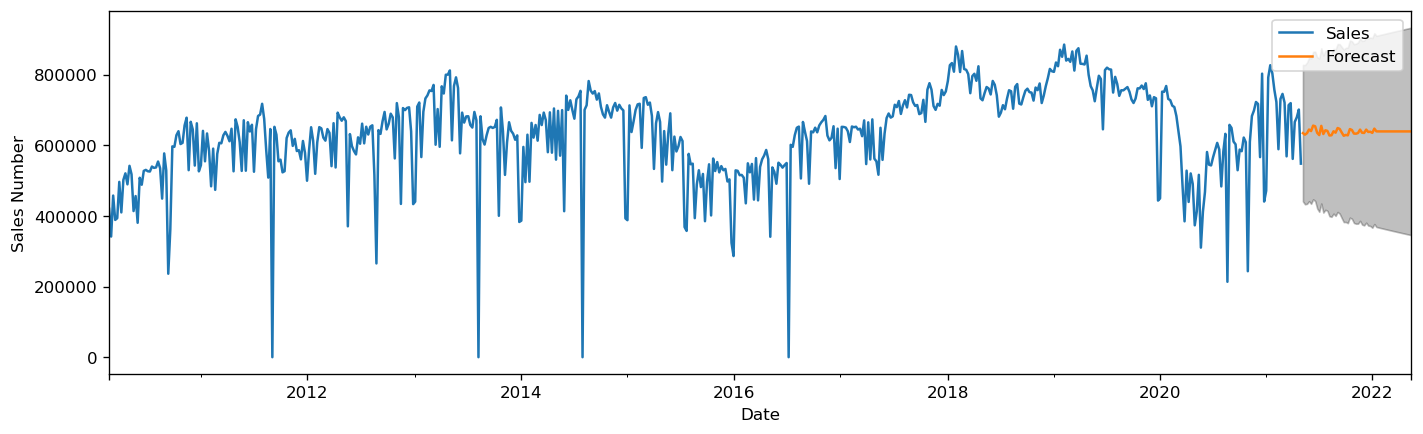

In [388]:
pred_uc = results.get_forecast(steps=54)
pred_ci = pred_uc.conf_int()
ax = weeklysales_df.plot(label='observed', figsize=(14, 4))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='r')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales Number')
plt.legend()
plt.savefig('Forecasted Future Sales.png')
plt.show()

**Forecasted Future Sales Number for Next One Year (2021-05-09) - (2022-05-15)**

In [326]:
#Gather all forecasted data into a dataframe
y_forecasted = pred_uc.predicted_mean

weeklysales_dfpred = y_forecasted.to_frame()
weeklysales_dfpred = pd.DataFrame(weeklysales_dfpred)
weeklysales_dfpred = weeklysales_dfpred.rename(columns={'predicted_mean':'Sales'})
weeklysales_dfpred

,Sales
2021-05-09,634542.271784
2021-05-16,630186.274409
2021-05-23,634434.266837
2021-05-30,644813.670639
2021-06-06,640403.464247
2021-06-13,655843.001604
2021-06-20,653816.709548
2021-06-27,635352.925807
2021-07-04,628988.217122
2021-07-11,655040.554488


**Forecasted Sales in 2021**

In [327]:
#first sales dataset, originally from the clients dataset
first_df = weeklysales_df[weeklysales_df.index.year == 2021]

#second dataset, which is generated from forecasting
second_df = weeklysales_dfpred[weeklysales_dfpred.index.year == 2021]

#merge these two dataset into one dataset
sales2021 = pd.concat([first_df, second_df])

#calculate accumulative sales
sales2021['AccumulativeSales'] = sales2021['Sales'].cumsum()

sales2021

,Sales,AccumulativeSales
2021-01-03,471356.000000,4.713560e+05
2021-01-10,792143.000000,1.263499e+06
2021-01-17,826863.000000,2.090362e+06
2021-01-24,804206.000000,2.894568e+06
2021-01-31,757333.000000,3.651901e+06
2021-02-07,722641.000000,4.374542e+06
2021-02-14,588977.000000,4.963519e+06
2021-02-21,731518.000000,5.695037e+06
2021-02-28,745675.000000,6.440712e+06
2021-03-07,721042.000000,7.161754e+06


(array([400000., 500000., 600000., 700000., 800000., 900000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

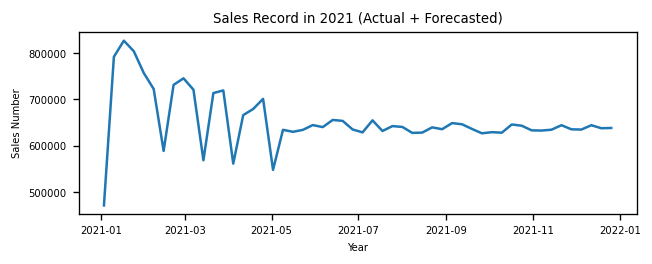

In [345]:
plt.figure(figsize=(6, 2))

#plot overall sales number record
plt.plot(sales2021.index, sales2021['Sales'])
plt.title('Sales Record in 2021 (Actual + Forecasted)', fontsize=8)
plt.xlabel('Year', fontsize=6)
plt.xticks(fontsize=6)
plt.ylabel('Sales Number', fontsize=6)
plt.yticks(fontsize=6)

## 4. Predict when, if it happens, a total of 30 million goods is sold by the client in 2021.

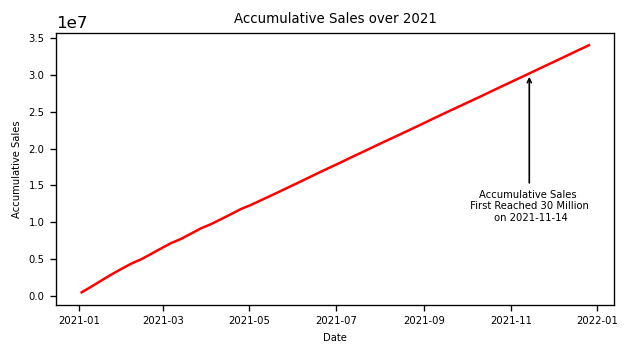

In [389]:
# Create a line plot of accumulative sales over time
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(sales2021.index, sales2021['AccumulativeSales'], color='r')

# Add an annotation when accumulative sales first reach 30 million
threshold = 30000000
threshold_date = sales2021.loc[sales2021['AccumulativeSales'] >= threshold].index[0].strftime('%Y-%m-%d')
x_threshold = sales2021.loc[sales2021['AccumulativeSales'] >= threshold].index[0]
y_threshold = sales2021.loc[sales2021['AccumulativeSales'] >= threshold]['AccumulativeSales'].iloc[0]
ax.annotate(f'Accumulative Sales \n First Reached {threshold/1000000:.0f} Million \n on {threshold_date}',
            xy=(x_threshold, y_threshold),
            xytext=(x_threshold, y_threshold-20000000),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            fontsize=6,
            horizontalalignment='center')

# Set the axis labels and title
ax.set_xlabel('Date', fontsize=6)
plt.xticks(fontsize=6)
ax.set_ylabel('Accumulative Sales', fontsize=6)
plt.yticks(fontsize=6)
ax.set_title('Accumulative Sales over 2021', fontsize=8)
plt.savefig('Predicted Acc Sales 2021.png')
plt.show()

**Observation**

From the model we have generated through the ARIMA model, we obtain forecasted sales number for the remaining 2021 year weeks. Here we can see from the calculated accumulative sales that **the client is predicted to reach just over 30 million sales in November 14th, 2021.**

### Recommendation 1

## 5. Suggest to the client which product(s) you think they should cut.

**Context:** 

Due to the unexpected COVID-19 pandemic, the client is heavily considering shutting down several of their warehouses, and as they will have limited space to store their goods, they will be forced to cut one or a few of their product lines.

**Analysis**

To give the accurate recommendation, the amount of remaining space or shut-down warehouse and the existing product line storage should be taken into consideration. But due to limited information we have here, we can only make judgement through each product performance, based on its sales number and profit they made. To make it more simple, we will review the profit performance through years.

From the exploratory data analysis that we conduct before modelling. It can be seen that:

* Based on product category, `Water Heaters`, `Vacuum Cleaners`, and `Dishwashers` are the least profitable among other categories. Contribute total 9% from the Total Profit in the past 3 years.

* But shutting down one product category without further analysis on the competition landscape seems a big deal since it will decrease the diversification that the client has had in the last years. Moreover it could also because of the limited product choice in that category. So we need to see the details in each product. If we see the profit growth through past 3 years, there are several product who have been consisntantly suffered an underwhelming performance such as:

    1. `Ikeda Ovens & Cooktops`, 

    2. `Ikeda Water Heaters`, 

    3. `Yoshikawa Water Heaters`, 

    4. `Hayashida Vacuum Cleaners`, 

    5. `Nanase Televisions`, while Nanase-branded television is new product that was just launched or started to be distributed by 2020 so we may wait and see for this product.

    6. `Ikeda Rice Cookers`, 

    7. `Matsumoto Dishwashers`, 

    8. `Akaza Vacuum Cleaners`, 

    9. `Omuro Water Heaters`, and 

    10. `Hisami Vacuum Cleaners`.
    
  Combine those product sales, **they only contribute 4.75% of all product sales number and 3.8% of all profit.** By removing these items, the client is left with 9 product categories and 25 products.

### Recommendation 2

## 6. Propose several ways the client could follow to improve their data collection and propose to them what data they could collect to accommodate future data analysis.

**Context**

Based on the information provided, the client's data collection practice involves manually recording daily sales data by the company's sales managers since early 2010. This manual process may have resulted in some days where the sales data is not available due to human error.

The daily sales data is consolidated by the set product category and maker. However, the product category data is stored in three different columns, where a column contains only a single word and empty entries are marked as "null".

Sales data is not available for weekends and public holidays as the warehouses only operate on weekdays. For audit purposes, the sales data is broken down into separate files divided by quarters.

**Recommendation**

To improve data collection, here are some suggestions for the client:

* **Automate Data Collection**: Implement a system to automatically record daily sales data that can reduce the human error and make sure all days are recorded. The client can use any POS (point-of-sales) service system. It typically consists of a combination of hardware and software that allows merchants to manage sales transactions, track inventory, process payments, and generate reports on sales and inventory data. The system ensures that businesses have accurate and up-to-date information on the availability of their products. Additionally, POS systems can integrate with other software systems, such as accounting or customer relationship management (CRM) software, to provide a comprehensive view of business operations.

* **Train Sales Officers and Managers**: Provide training to the sales managers on data keeping best practices and how the sales officers to input data accurately.

* **Standardize Data**: Standardize the way data is stored, for example, store product category data in a single column with no empty entries.

* **Include Weekend and Public Holiday Data**: Consider adding data for weekends and public holidays even if the warehouses are closed during these periods, as this could help in analyzing sales patterns.

* **Consolidate Quarterly Sales Data**: Consolidate quarterly sales data into a single file instead of separate files to simplify data analysis.

As for the data the client could collect to accommodate future data analysis, the client could consider the following:

* **Geographical data**: It would be useful to include information on the geographic location of their customers to better understand the demand for certain products in different regions.

* **Customer demographics**: Collecting data on customer demographics such as age, gender, and income could provide valuable insights into their target market.

* **Inventory data**: Collecting data on inventory levels and turnover could help in optimizing supply chain and inventory management. This data is very important since currently the client is heavily considering shutting down several of their warehouses. Combining this data with transaction data can give better recommendation on stock or inventory optimization.